<img align="center" src="data/handout/course.png" width="800">

## Hough Transform - Assignment 1
    Instructor: Kris                          TAs: Arka, Jinkun, Rawal, Rohan, Sheng-Yu

In this assignment you will be implementing a Hough Transform based line detector. 

<img align="center" src="data/handout/ht.gif" width="500">

---
## Theory Questions (25 points)
**Grading**: 
- Each question is 5 points. 
- Please add your answers to the writeup. Insert images whenever necessary.
- Show all your work to obtain full credit.

**Q1**: Show that using $ x\cos \theta + y \sin \theta - \rho = 0 $, each image point $(x, y)$ results in a sinsuoid in $(\rho, \theta)$ hough space.  
Use the formulation, $a \sin \theta + b \cos \theta = A \sin(\theta + \phi)$ for the sinsuoid.  
Write the amplitude \\(A \\) and phase \\( \phi \\) of the sinusoid as a function of \\( (x, y) \\). 

where $x$ and $y$ refer to a point on the line

$xcos(\theta) + ysin(\theta) = \rho$

$\sqrt{x^2 + y^2} * \frac{xcos(\theta)}{\sqrt{x^2 + y^2}}+ \sqrt{x^2 + y^2} * \frac{ysin(\theta)}{\sqrt{x^2 + y^2}} = \rho$

Make the following in order to use the $sin(\theta+\phi)$ identity: 

$sin(\phi) = \frac{x}{\sqrt{x^2 + y^2}}$
$cos(\phi) = \frac{y}{\sqrt{x^2 + y^2}}$

Plug back in:

$\sqrt{x^2 + y^2} * (sin(\phi)cos(\theta) + cos(\phi)sin(\theta)) = \rho$

Use the identity:

$\sqrt{x^2 + y^2} * sin(\phi + \theta) = \rho$

Here:

$A = \sqrt{x^2 + y^2}$

$\phi = \phi$








**Q2**: Why do we parameterize the line in terms of \\(\rho, \theta\\) instead of slope and intercept \\((m, c)\\)?  
Also write the slope \\(m\\) and intercept \\(c\\) as a function of \\(\rho\\) and \\(\theta\\). 

If we have a point (x,y) and we are finding parameters m (slope) and c (intercept) that correspond to that point (pass through that point), We could potentially have an infinite number of values for m that line which would make our accumulator array extremely large and require a lot of computations.

#### Using trinagles to derive equation for $\rho$ some of the notation from this diagram is used below
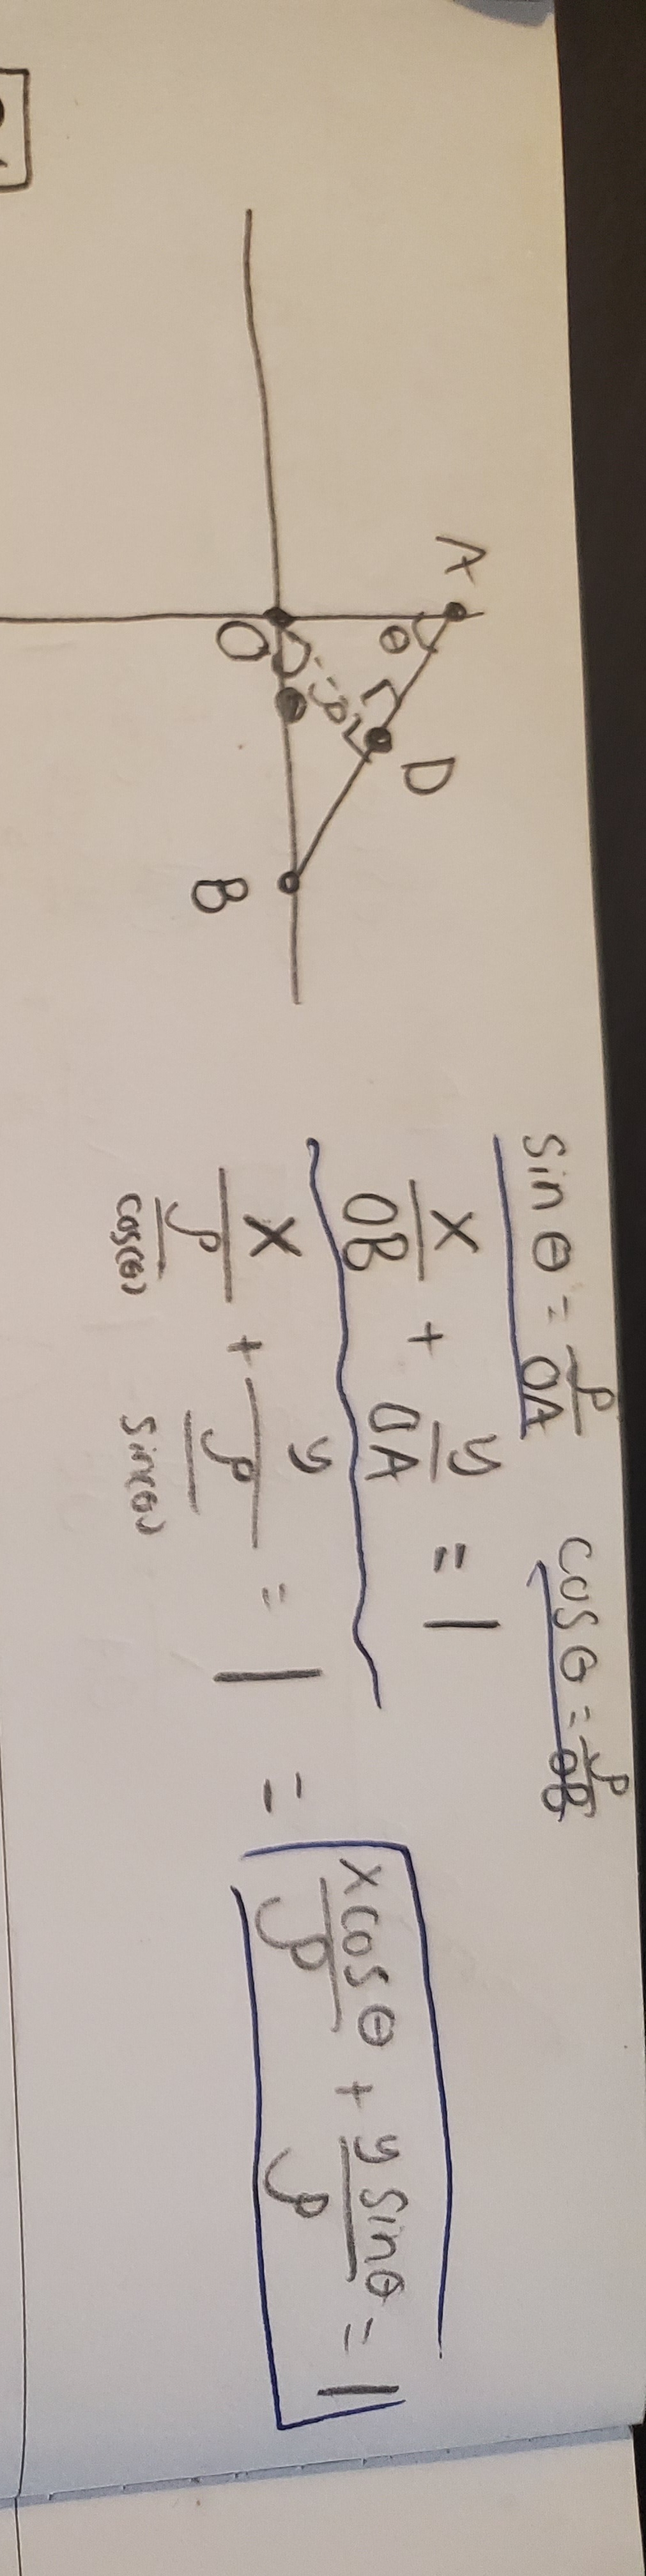


#### Computation of x and y

$x = \frac{\rho - ysin(\theta)}{cos(\theta)}$ 

$y = \frac{\rho - xcos(\theta)}{sin(\theta)}$ 

#### Computation of m

$m = \frac{OA}{OB}$

$m = \frac{\frac{\rho}{sin(\theta)}}{\frac{\rho}{cos(\theta)}}$

$m = cot(\theta)$

### Computation of c

$c = y - mx$

$c = \frac{\rho - xcos(\theta)}{sin(\theta)} - cot(\theta) *  \frac{\rho - ysin(\theta)}{cos(\theta)}$

$c = \frac{\rho - xcos(\theta)}{sin(\theta)} - \frac{cos(\theta)}{sin(\theta)} *  \frac{\rho - ysin(\theta)}{cos(\theta)}$

$c = \frac{\rho - xcos(\theta)}{sin(\theta)} - \frac{\rho - ysin(\theta)}{sin(\theta)}$

$c = \frac{ysin(\theta) - x cos(\theta)}{sin(\theta)}$


**Q3**: Assume the image points \\((x, y)\\) are in an image of width \\(W\\) and height \\(H\\), \\(x \in [1, W], y \in [1, H]\\).  
What is the maximum absolute value of \\(\rho\\) and what is the range of \\(\theta\\)?

The maximum absolute value of p would be the distance of the straight line from one corner of the image to another.

That is:
$ \rho_{max} = \sqrt{W^2 + H^2}$

The range of $\theta$ should be all possible angles, that is:

$range_{\theta} = [0, 2\pi] or [0, 360]$ in radians and degrees respectively

**Q4**: For points $(10, 10)$, $(15, 15)$ and $(30, 30)$ in the image, plot the corresponding sinusoid waves in Hough space $(\rho, \theta)$.  
Also visualize how their intersection point defines the line (what is ($m, c$) for this line?).  
Please add the plot as image.

For this:
$c = 0$
$m = 1$

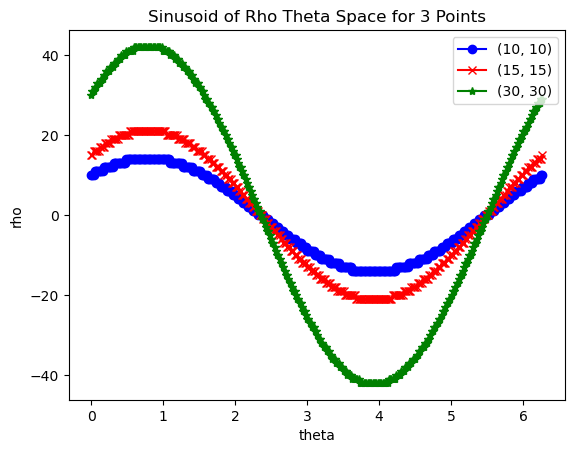

In [4]:
import numpy as np
import math
from matplotlib import pyplot as plt

points = [(10, 10), (15, 15), (30, 30)]
rho = np.arange(-10, 10, 0.01)
theta = np.arange(0, 2*math.pi, 1 * math.pi/180)

for idx, point in enumerate(points):
    x, y = point
    rhos = []
    for t in theta:
        rho = round(x * math.cos(t) + y * math.sin(t))
        rhos.append(rho)
    
    if idx == 0:
        color = "bo-"
        label = "(10, 10)"
    elif idx == 1:
        color = "rx-"
        label = "(15, 15)"
    else:
        color = "g*-"
        label = "(30, 30)"
    plt.plot(theta, rhos, color, label=label)

plt.xlabel("theta")
plt.ylabel("rho")
plt.title("Sinusoid of Rho Theta Space for 3 Points")
plt.legend(loc = "upper right")

**Q5**: How does the dimension of parameter space affects Hough Transform method? What would you do when the parameter space is high, i.e., 3D or 4D instead of 2D? Briefly explain your method.

The dimension of the parameter space will exponentially increase computation time and make the accumulator array sparser. If we have two parameters, we have an accumulator array with two dimensions. If we have additional paramters, our accumulator array will also need to account for those additional parameters to accurately capture all combinations of parameters. Thus, our accumulator array will likely become much more sparse. We can visualize why it would become more sparse with a simple visualization. Say we have a 2D sinsusoidal response with a few bright spots (points) that correspond to the overlap of the sinusoids, dictating where a line edge is in paramter space. Well, if we add an arbritrary dummy parameter (say that does nothing, just adds another dimension to the graph) our response will lie in a plane while the rest of the parameter space (the other planes) are empty. So, unless we are adding a lot of information when introducing this new parameter, we can expect the array to be much sparser and complex to find the edges.

In a 3D or 4D parameter space, the algorithm would need to change to find the overlap of sinusoidal surfaces in a similar voting method. 
1. Instead of searching the entire parameter space. We could possibly search a 2D parameter space (maybe precompute something to see which two parameters are the densest?) and fix the other parameters to possibly create a set of "maximal candidates" then add further confidence by searching those maximal candidates over the range of the parameters previously kept fixed. This is a search heuristic but possibly could have semi-reliable results.
2. Use PCA or some other dimensionality reduction then stick to the previous algorithm over the reduced parameter space
3. Hill-climbing or some other greedy search algorithm which will look for local extrema, moving along the derivatives of votes throughout the parameter space. Possibling randomly initializing the starting point in parameter space N times then look at which points in the parameter space are the most common 

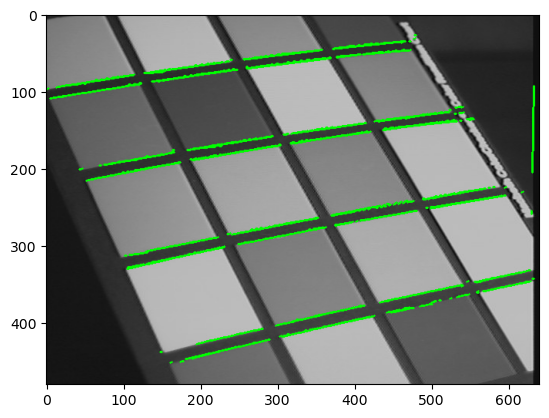

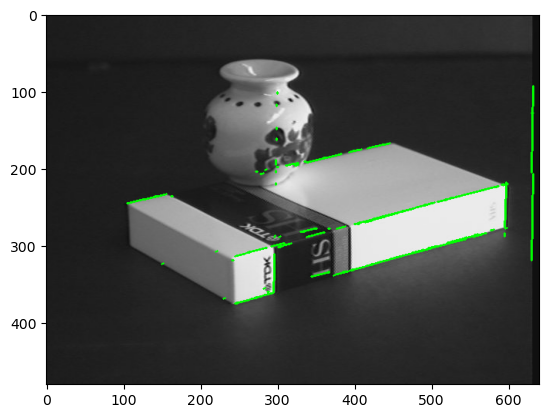

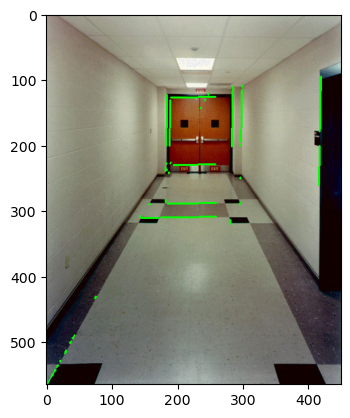

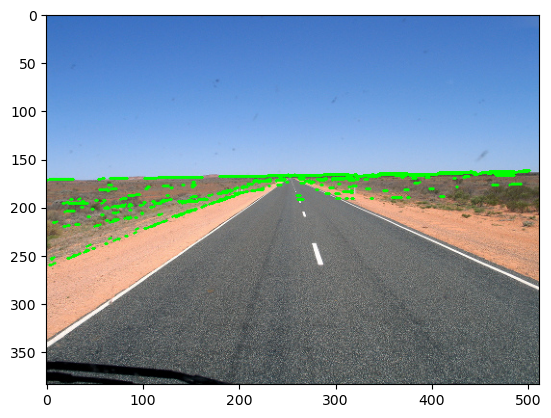

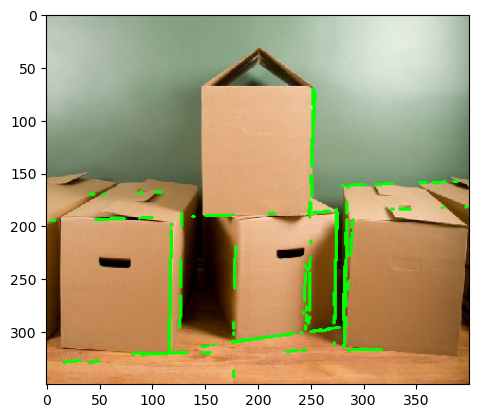

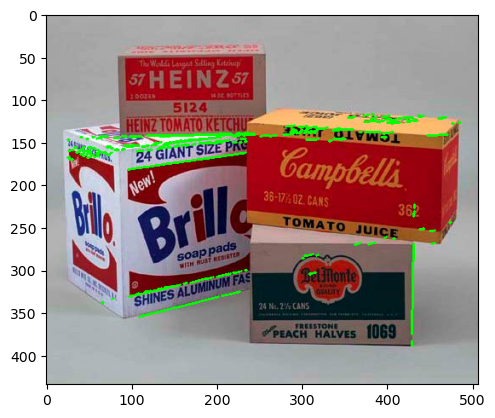

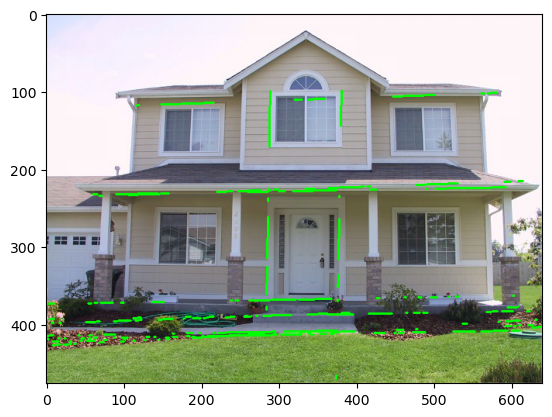

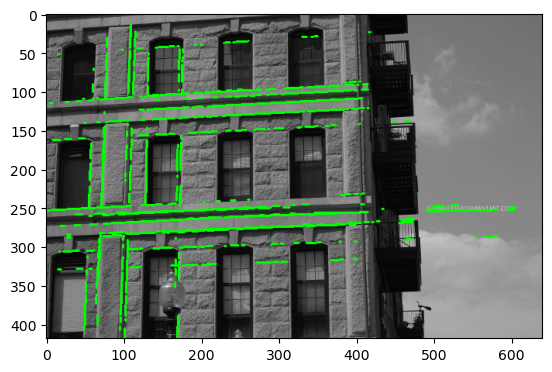

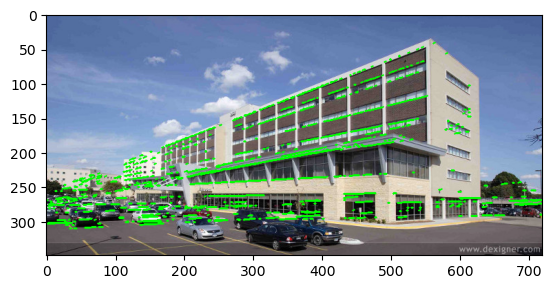

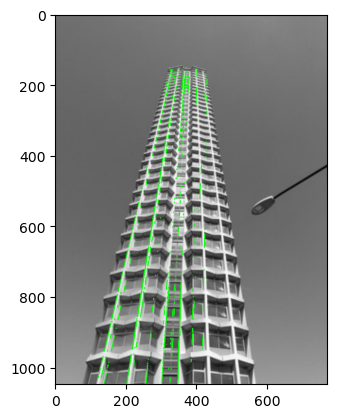